In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# First, I'll retrain the best model found in the notebook on the entire dataset and prepare a forecast for the next 30 days.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from datetime import timedelta
import pandas as pd
energy_data = pd.read_csv('./Energy_consumption.csv')

# Define features and target
X = energy_data.drop(columns=['EnergyConsumption', 'Timestamp'])
y = energy_data['EnergyConsumption']

# Identify categorical and numerical columns
categorical_features = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Define the model pipeline with RandomForest (assuming it was the best model found)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=0))
])

# Train the model on the entire dataset
pipeline.fit(X, y)

# Generate future data (30 days) based on sample patterns from the dataset
future_period = 30
last_date = pd.to_datetime(energy_data['Timestamp'].iloc[-1])
future_dates = [last_date + timedelta(days=i) for i in range(1, future_period + 1)]

# Use median values from the dataset for simplicity in this example
future_data = pd.DataFrame({
    'Temperature': np.full(future_period, energy_data['Temperature'].median()),
    'Humidity': np.full(future_period, energy_data['Humidity'].median()),
    'SquareFootage': np.full(future_period, energy_data['SquareFootage'].median()),
    'Occupancy': np.full(future_period, energy_data['Occupancy'].median()),
    'HVACUsage': ['On'] * future_period,
    'LightingUsage': ['Off'] * future_period,
    'RenewableEnergy': np.full(future_period, energy_data['RenewableEnergy'].median()),
    'DayOfWeek': [date.strftime('%A') for date in future_dates],
    'Holiday': ['No'] * future_period
})

# Make predictions for the future data
future_predictions = pipeline.predict(future_data)

# Prepare the results with dates and predicted energy consumption
forecast_results = pd.DataFrame({
    'Date': future_dates,
    'PredictedEnergyConsumption': future_predictions
})

forecast_results


,Date,PredictedEnergyConsumption
0,2022-02-12 15:00:00,79.871146
1,2022-02-13 15:00:00,79.192013
2,2022-02-14 15:00:00,79.736891
3,2022-02-15 15:00:00,79.856498
4,2022-02-16 15:00:00,81.514237
5,2022-02-17 15:00:00,79.589946
6,2022-02-18 15:00:00,79.698917
7,2022-02-19 15:00:00,79.871146
8,2022-02-20 15:00:00,79.192013
9,2022-02-21 15:00:00,79.736891


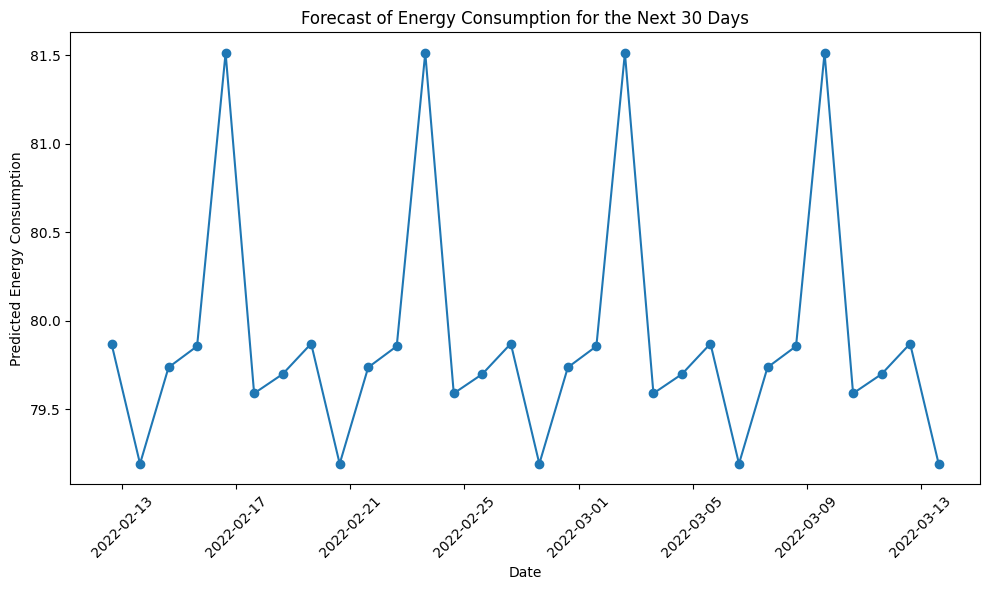

: 

In [3]:
import matplotlib.pyplot as plt

# Plotting the forecasted energy consumption for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(forecast_results['Date'], forecast_results['PredictedEnergyConsumption'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Predicted Energy Consumption')
plt.title('Forecast of Energy Consumption for the Next 30 Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
